# Loading a flat-sky map with particle-based pasting

First, we import modules. The flat-sky map is hdf5 format. The h5py package is required.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

Then, we load tSZ and kSZ hdf5 files.

In [2]:
ymap = h5py.File("flatsky_PP_tSZ_r000.hdf5", "r")
bmap = h5py.File("flatsky_PP_kSZ_r000.hdf5", "r")

In [3]:
angle = ymap['tSZ_map'].attrs['Angle']
n = ymap['tSZ_map'].attrs['Grid']

print("opening angle: {} [deg]".format(angle))
print("number of grid: {}".format(n))

opening angle: 5.0 [deg]
number of grid: 4096


In [4]:
ymap_data = ymap['tSZ_map'][:]
bmap_data = bmap['kSZ_map'][:]

ymap.close()
bmap.close()

Next, we plot flat-sky tSZ and kSZ maps.

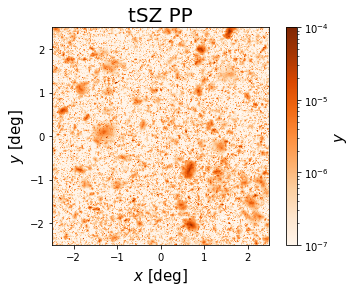

In [5]:
theta = np.linspace(-0.5*angle, 0.5*angle, n)
X, Y = np.meshgrid(theta, theta)

plt.pcolormesh(X, Y, ymap_data, shading="auto",
               norm=colors.LogNorm(vmin=1e-7, vmax=1e-4),
               cmap="Oranges", rasterized=True)
ax = plt.gca()
ax.set_aspect('equal')
cb = plt.colorbar()
cb.set_label(r'$y$', size=15)

plt.xlabel(r"$x \ [\mathrm{deg}]$", fontsize=15)
plt.ylabel(r"$y \ [\mathrm{deg}]$", fontsize=15)
plt.title(r"tSZ PP", fontsize=20)
plt.show()

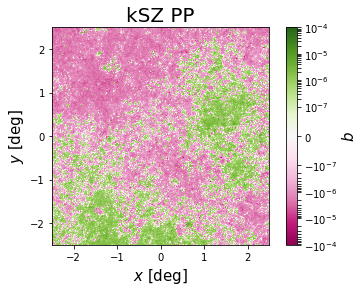

In [6]:
plt.pcolormesh(X, Y, bmap_data, shading="auto",
                norm=colors.SymLogNorm(linthresh=1e-7, linscale=1.0,
                vmin=-1e-4, vmax=1e-4, base=10),
                cmap="PiYG", rasterized=True)
ax = plt.gca()
ax.set_aspect('equal')
cb = plt.colorbar()
cb.set_label(r'$b$', size=15)

plt.xlabel(r"$x \ [\mathrm{deg}]$", fontsize=15)
plt.ylabel(r"$y \ [\mathrm{deg}]$", fontsize=15)
plt.title(r"kSZ PP", fontsize=20)
plt.show()

For PP maps, "field" and "halo" particles only maps are provided. Below, one of these maps are shown.

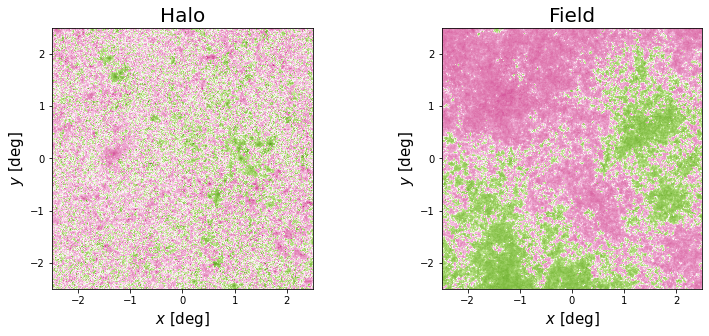

In [7]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

f = h5py.File("flatsky_PP_halo_kSZ_r000.hdf5", "r")
bmap_halo = f["kSZ_map"][:]
f.close()

f = h5py.File("flatsky_PP_field_kSZ_r000.hdf5", "r")
bmap_field = f["kSZ_map"][:]
f.close()

ax0.pcolormesh(X, Y, bmap_halo, shading="auto",
               norm=colors.SymLogNorm(linthresh=1e-7, linscale=1.0,
               vmin=-1e-4, vmax=1e-4, base=10), cmap="PiYG", rasterized=True)
ax0.set_aspect('equal')

ax0.set_xlabel(r"$x \ [\mathrm{deg}]$", fontsize=15)
ax0.set_ylabel(r"$y \ [\mathrm{deg}]$", fontsize=15)
ax0.set_title(r"Halo", fontsize=20)


ax1.pcolormesh(X, Y, bmap_field, shading="auto",
               norm=colors.SymLogNorm(linthresh=1e-7, linscale=1.0,
               vmin=-1e-4, vmax=1e-4, base=10), cmap="PiYG", rasterized=True)
ax1.set_aspect('equal')

ax1.set_xlabel(r"$x \ [\mathrm{deg}]$", fontsize=15)
ax1.set_ylabel(r"$y \ [\mathrm{deg}]$", fontsize=15)
ax1.set_title(r"Field", fontsize=20)

plt.show()